<a href="https://colab.research.google.com/github/derekschirripa/AERO_489_Machine_Learning/blob/main/AERO_489_Gaussian_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt
from GPyOpt.methods import BayesianOptimization
import aerosandbox as asb #using aerosandbox since I cannot get xfoil to work.



num acquisition: 1, time elapsed: 1.26s
num acquisition: 2, time elapsed: 2.51s
num acquisition: 3, time elapsed: 3.44s
num acquisition: 4, time elapsed: 4.87s
num acquisition: 5, time elapsed: 6.49s
num acquisition: 6, time elapsed: 7.98s
num acquisition: 7, time elapsed: 8.78s
num acquisition: 8, time elapsed: 9.34s
num acquisition: 9, time elapsed: 10.44s
num acquisition: 10, time elapsed: 11.07s
num acquisition: 11, time elapsed: 11.58s
num acquisition: 12, time elapsed: 12.17s
num acquisition: 13, time elapsed: 12.66s
num acquisition: 14, time elapsed: 13.17s
num acquisition: 15, time elapsed: 13.79s
num acquisition: 16, time elapsed: 14.52s
num acquisition: 17, time elapsed: 15.08s
num acquisition: 18, time elapsed: 16.12s
num acquisition: 19, time elapsed: 17.29s
num acquisition: 20, time elapsed: 18.73s
num acquisition: 21, time elapsed: 19.99s
num acquisition: 22, time elapsed: 20.75s
num acquisition: 23, time elapsed: 21.63s
num acquisition: 24, time elapsed: 22.41s
num acqui

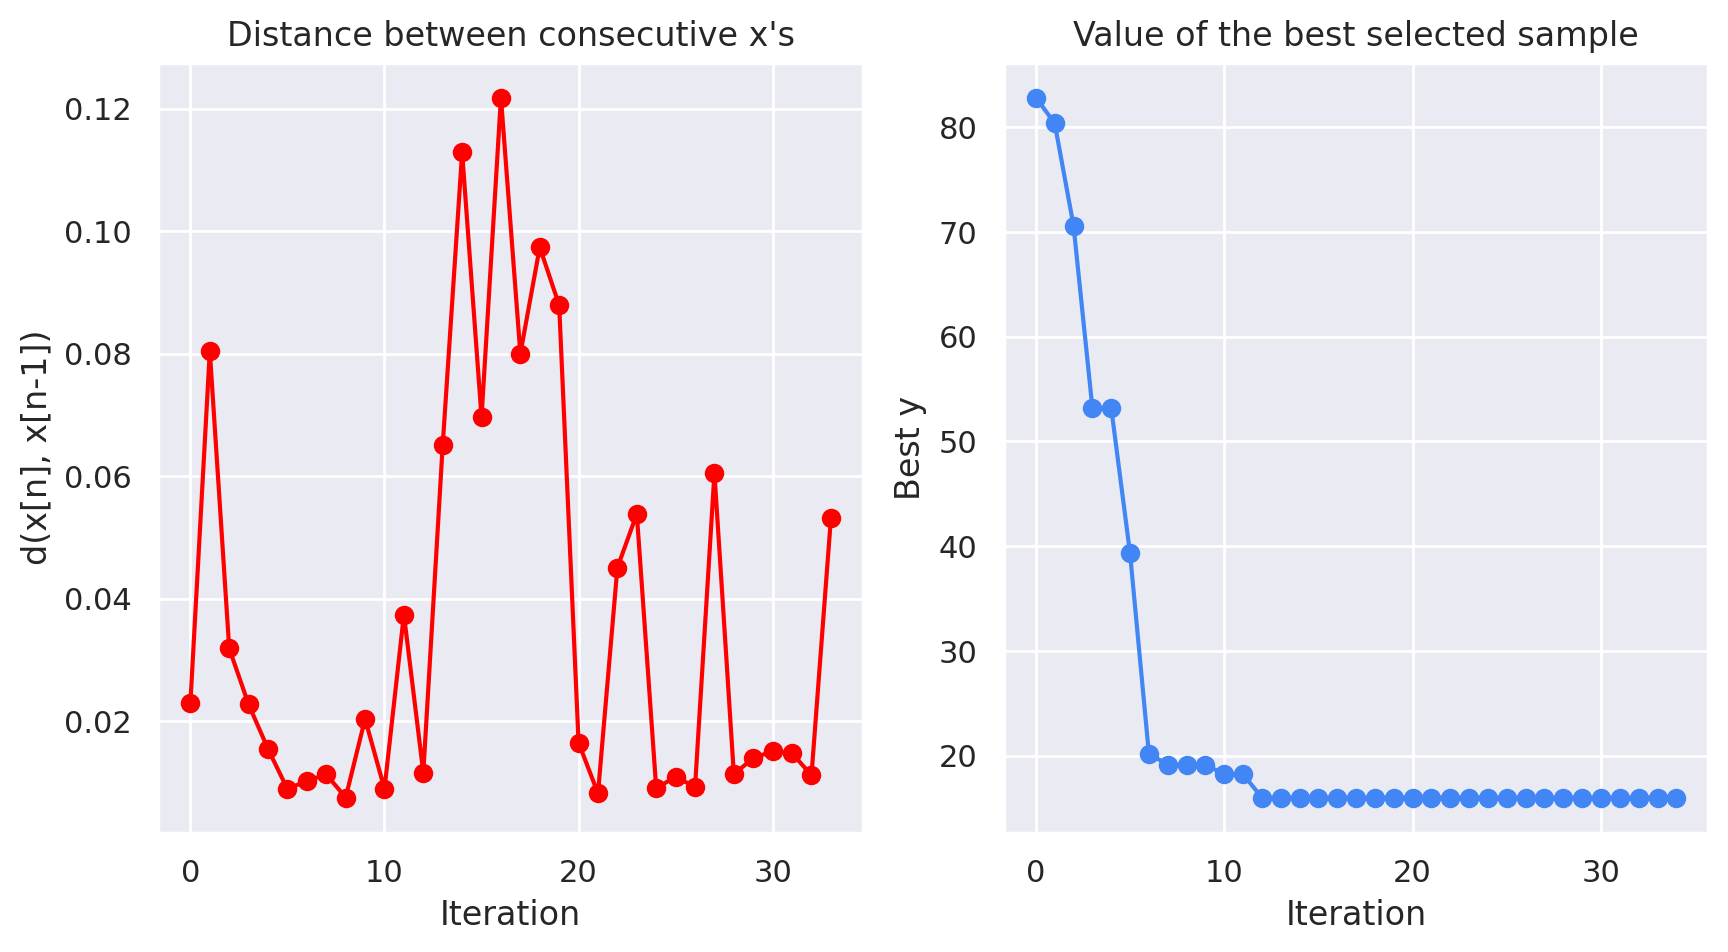

In [125]:
def objective_function(x):
  thickness, camber = x[:,0], x[:,1]
  L_to_D_return = []
  for i in thickness:
    for j in camber:
      t = 100*i #converting thickness into a percentage
      c = 100*j #converting maximum camber into a percentage
      airfoil = asb.Airfoil(f"naca{int(c)}4{int(t)}") #creating a naca airfoil where max camber occurs at 40% chord
      alpha = 0 #degrees #finding L/D at 0 AoA
      Re = 1e6 #high Reynold's number
      mach = 0.2 #imcompressible flow

      #using aerosandbox's neuralfoil instead of xfoil. it is >90% accurate compared to xfoil. It is around 95% accurate low speed airfoils

      cl = float(airfoil.get_aero_from_neuralfoil(alpha,Re,mach)["CL"])
      c_d = float(airfoil.get_aero_from_neuralfoil(alpha,Re,mach)["CD"])
      L_to_D = cl/c_d

    L_to_D_return.append(L_to_D)

  return L_to_D_return

#creating the domain to the GP optimization. They are continuous domains
bounds = [{'name':'thickness','type':'continuous','domain':(0.1,0.2)},
          {'name':'camber','type':'continuous','domain':(0.01,0.09)}]

domain = bounds

optimizer = BayesianOptimization(f=objective_function,
                                 domain=domain,
                                 model_type='GP',
                                 acquisition_type='EI',
                                 acquisition_jitter=0.05,
                                 exact_feval=True,
                                 mximize=False)

initial_design_numdata = 10 #initial number of points
max_iter = 30 #it flattens out around here. no need for more iterations
optimizer.run_optimization(max_iter=max_iter, verbosity=True)
print("Optimal thickness: ",optimizer.x_opt[0])
print("Optimal maximum camber: ",optimizer.x_opt[1])
print("Optimal lift_to_drag ratio: ",optimizer.fx_opt)
optimizer.plot_convergence()



